In [3]:
import os
import pandas as pd
import numpy as np

In [4]:
os.getcwd()
os.chdir('/Users/chenxingkun/Project_repo/Mobiground')

In [5]:
cpxls = pd.read_excel('Campaign Performance.xlsx', index=False)

In [6]:
cpxls['Campaign id'][0]

805641835

In [7]:
cpxls.iloc[0][19]

805641835

In [8]:
print (cpxls.shape)
print (cpxls.columns)

i = 0
for col in cpxls.columns:
    print (i," ",col)
    i += 1

(1200, 27)
Index(['Hour of day', 'Campaign status', 'Campaign', 'Budget name', 'Budget',
       'Type of budget', 'Status', 'Bid strategy', 'CPC avg.', 'Impressions',
       'Clicks', 'CTR', 'Cost', 'Conversions', 'Cost/conv.', 'Conversion rate',
       'Percentage viewable', 'Non viewable impressions distrib.', 'Avg cost',
       'Campaign id', 'Value conv./click', 'Value conv./coste',
       'Impr. viewable', 'CTR viewable', 'Impr. non viewable',
       'Non measurable impr.', 'CPM avg viewable'],
      dtype='object')
0   Hour of day
1   Campaign status
2   Campaign
3   Budget name
4   Budget
5   Type of budget
6   Status
7   Bid strategy
8   CPC avg.
9   Impressions
10   Clicks
11   CTR
12   Cost
13   Conversions
14   Cost/conv.
15   Conversion rate
16   Percentage viewable
17   Non viewable impressions distrib.
18   Avg cost
19   Campaign id
20   Value conv./click
21   Value conv./coste
22   Impr. viewable
23   CTR viewable
24   Impr. non viewable
25   Non measurable impr.
26   CP

In [9]:
reorder = [19,2,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,0]

In [10]:
cpxls = cpxls[[cpxls.columns[i] for i in reorder]]
cp_pd = cpxls.drop(cpxls.columns[3], axis =1)

In [11]:
cp_pd['Campaign id'][0]

805641835

In [12]:
cp_pd.dtypes

Campaign id                            int64
Campaign                              object
Campaign status                       object
Budget                               float64
Type of budget                        object
Status                                object
Bid strategy                          object
CPC avg.                             float64
Impressions                            int64
Clicks                                 int64
CTR                                   object
Cost                                 float64
Conversions                            int64
Cost/conv.                           float64
Conversion rate                      float64
Percentage viewable                   object
Non viewable impressions distrib.     object
Avg cost                             float64
Value conv./click                    float64
Value conv./coste                    float64
Impr. viewable                         int64
CTR viewable                          object
Impr. non 

In [13]:
cols = cp_pd.columns.tolist()

cp_dropped = cp_pd.replace(' --', np.nan)

In [14]:
print (cp_dropped.isnull().any())
print ('---------------------------')
print (cp_dropped.shape)
print ('---------------------------')
print (cp_dropped.isnull().sum())

Campaign id                          False
Campaign                             False
Campaign status                      False
Budget                               False
Type of budget                       False
Status                               False
Bid strategy                         False
CPC avg.                             False
Impressions                          False
Clicks                               False
CTR                                   True
Cost                                 False
Conversions                          False
Cost/conv.                           False
Conversion rate                      False
Percentage viewable                   True
Non viewable impressions distrib.     True
Avg cost                             False
Value conv./click                    False
Value conv./coste                    False
Impr. viewable                       False
CTR viewable                          True
Impr. non viewable                   False
Non measura

In [15]:
cp = cp_dropped.dropna()
cp.shape

(829, 26)

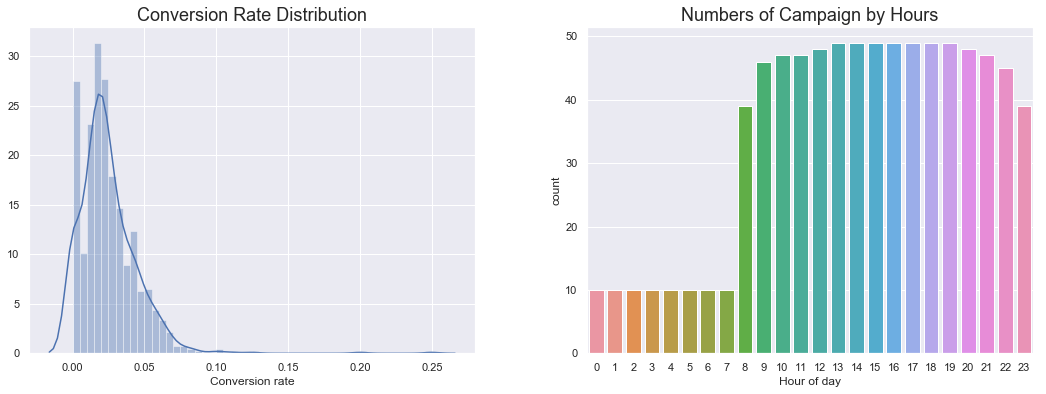

In [33]:
import  matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
fig, ax = plt.subplots (1,2, figsize = (18,6))
ax[0].set_title('Conversion Rate Distribution',fontsize = 18)
ax[1].set_title('Numbers of Campaign by Hours', fontsize = 18)
sns.distplot(cp["Conversion rate"], ax=ax[0])
sns.countplot(x = 'Hour of day',data = cp, ax=ax[1])
fig.subplots_adjust (hspace = 0.25, wspace = 0.25) #adjust the gap between two graphs

plt.show()

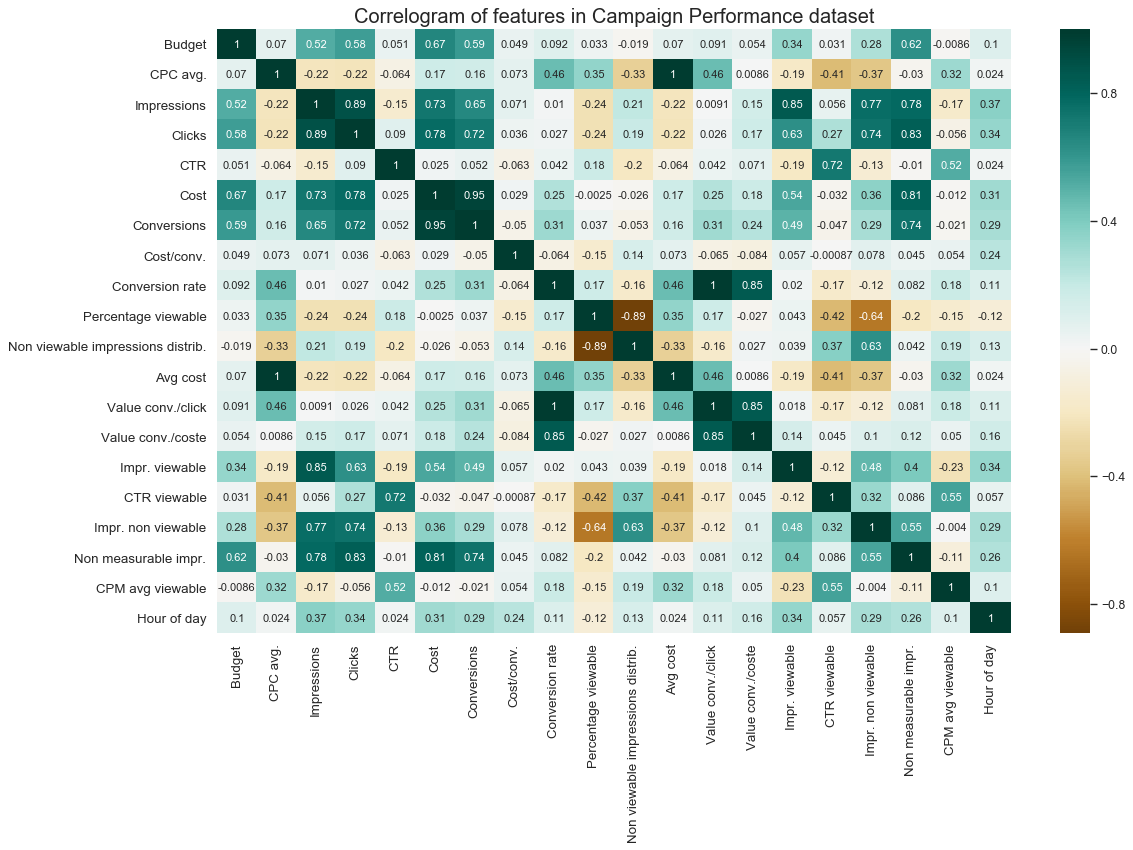

In [17]:
# Correlation between all features:
corr = cp.drop(cp.columns[[0,1,2,4,5,6]], axis = 1).corr()
# Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.heatmap(corr, cmap='BrBG', annot = True, xticklabels=corr.columns, yticklabels=corr.columns, center=0)
# Decorations
plt.title('Correlogram of features in Campaign Performance dataset', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [18]:
i = 0
for col in cp.columns:
    print (i," ",col)
    i += 1

0   Campaign id
1   Campaign
2   Campaign status
3   Budget
4   Type of budget
5   Status
6   Bid strategy
7   CPC avg.
8   Impressions
9   Clicks
10   CTR
11   Cost
12   Conversions
13   Cost/conv.
14   Conversion rate
15   Percentage viewable
16   Non viewable impressions distrib.
17   Avg cost
18   Value conv./click
19   Value conv./coste
20   Impr. viewable
21   CTR viewable
22   Impr. non viewable
23   Non measurable impr.
24   CPM avg viewable
25   Hour of day


In [19]:
cp_new = cp.drop(cp.columns[[2,5,17]], axis = 1)

In [26]:
#clustering and ensemble
cp_new['Campaign id'].unique()

array([ 805641835, 1355111994,  718571022,  796862534,  911705014,
       1488169083, 1357520281,  921653713, 1494558651, 1065978373,
       1355110683,  923411418,  658187913, 1370675237, 1082774761,
        755896531, 1082774638, 1391287343,  823315193,  658187910,
        758102625,  798017169,  828945026, 1348008200,  921653710,
       1491805597,  812520877, 1061908007, 1356947006, 1340990588,
       1493887128, 1485059924, 1336783100, 1342000730,  932069005,
       1357520284,  998907782, 1334150552, 1054262841, 1356947003,
       1340140757, 1425539902, 1060511720,  760320140,  892330681,
        833830736, 1356947012,  911705017, 1488169086])

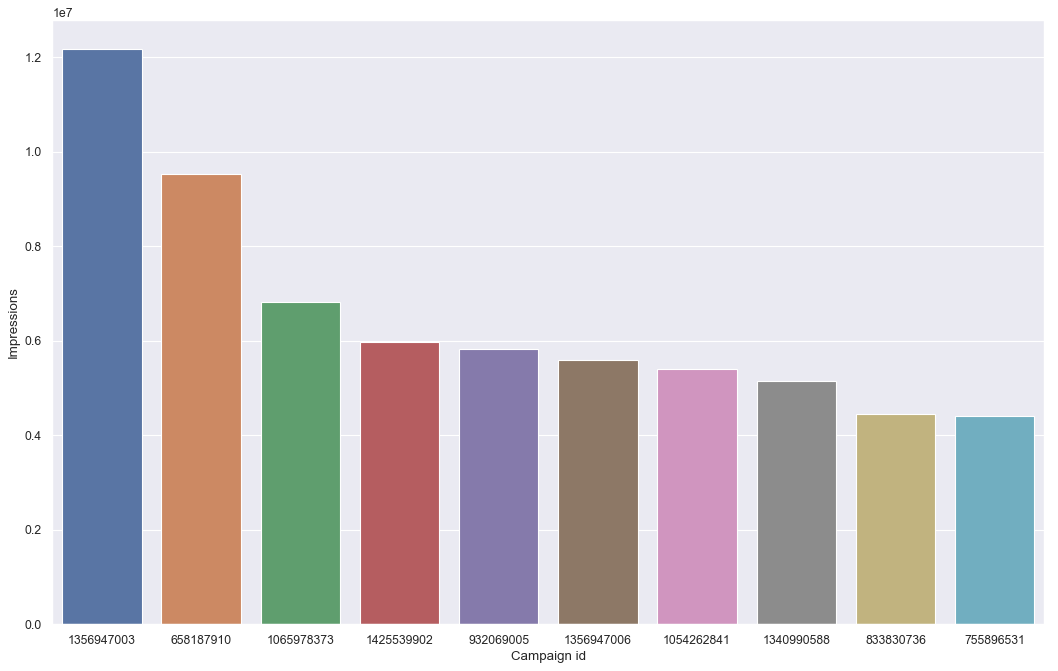

In [105]:
countplot_imp = cp_new.groupby('Campaign id').agg({'Impressions' : 'sum'})\
                .sort_values(by = 'Impressions', ascending = False)[:10].reset_index()

#countplot_imp.columns
#plt.figure(figsize=(16,10))
#sns.barplot(x ='Campaign id', y = 'Impressions', data = countplot_imp)
plt.figure(figsize=(16,10), dpi= 80)
ax = sns.barplot(x = 'Campaign id', y = 'Impressions', data = countplot_imp,\
                 order = countplot_imp['Campaign id'])

plt.show()

In [365]:
cp_m = cp.drop(cp.columns[[0,1,2,4,5,7,10,13,14,16,17,18,19,20,21,22,23,24]], axis = 1)

In [366]:
#reorder columns
reorder_1 = [0,1,2,3,4,6,7,5]
cp_m = cp_m[[cp_m.columns[i] for i in reorder_1]].reset_index().drop('index', axis = 1)

In [367]:
cp_m.head(5)

,Budget,Bid strategy,Impressions,Clicks,Cost,Percentage viewable,Hour of day,Conversions
0,120.00,CPA Objective,120241,1112,146.13,0.4684,9,22
1,15.00,CPC manual,6979,147,12.76,0.6758,9,1
2,43.67,CPC manual,241521,3388,406.81,0.9028,23,58
3,30.00,CPA Objective,146773,2649,289.86,0.8731,14,49
4,220.00,CPA Objective,126379,1175,222.52,0.9140,11,26


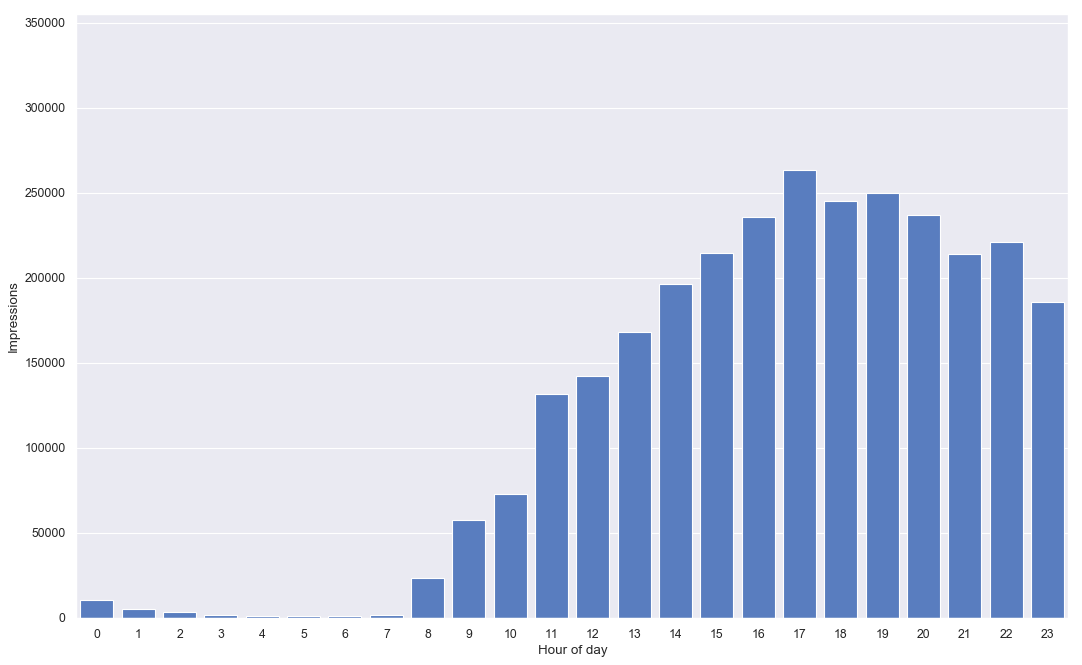

In [368]:
sns.set_style("darkgrid")

plt.figure(figsize=(16,10), dpi= 80)
ax = sns.barplot(x = 'Hour of day', y = 'Impressions', data = cp_m, color = 'b',errwidth = 0)

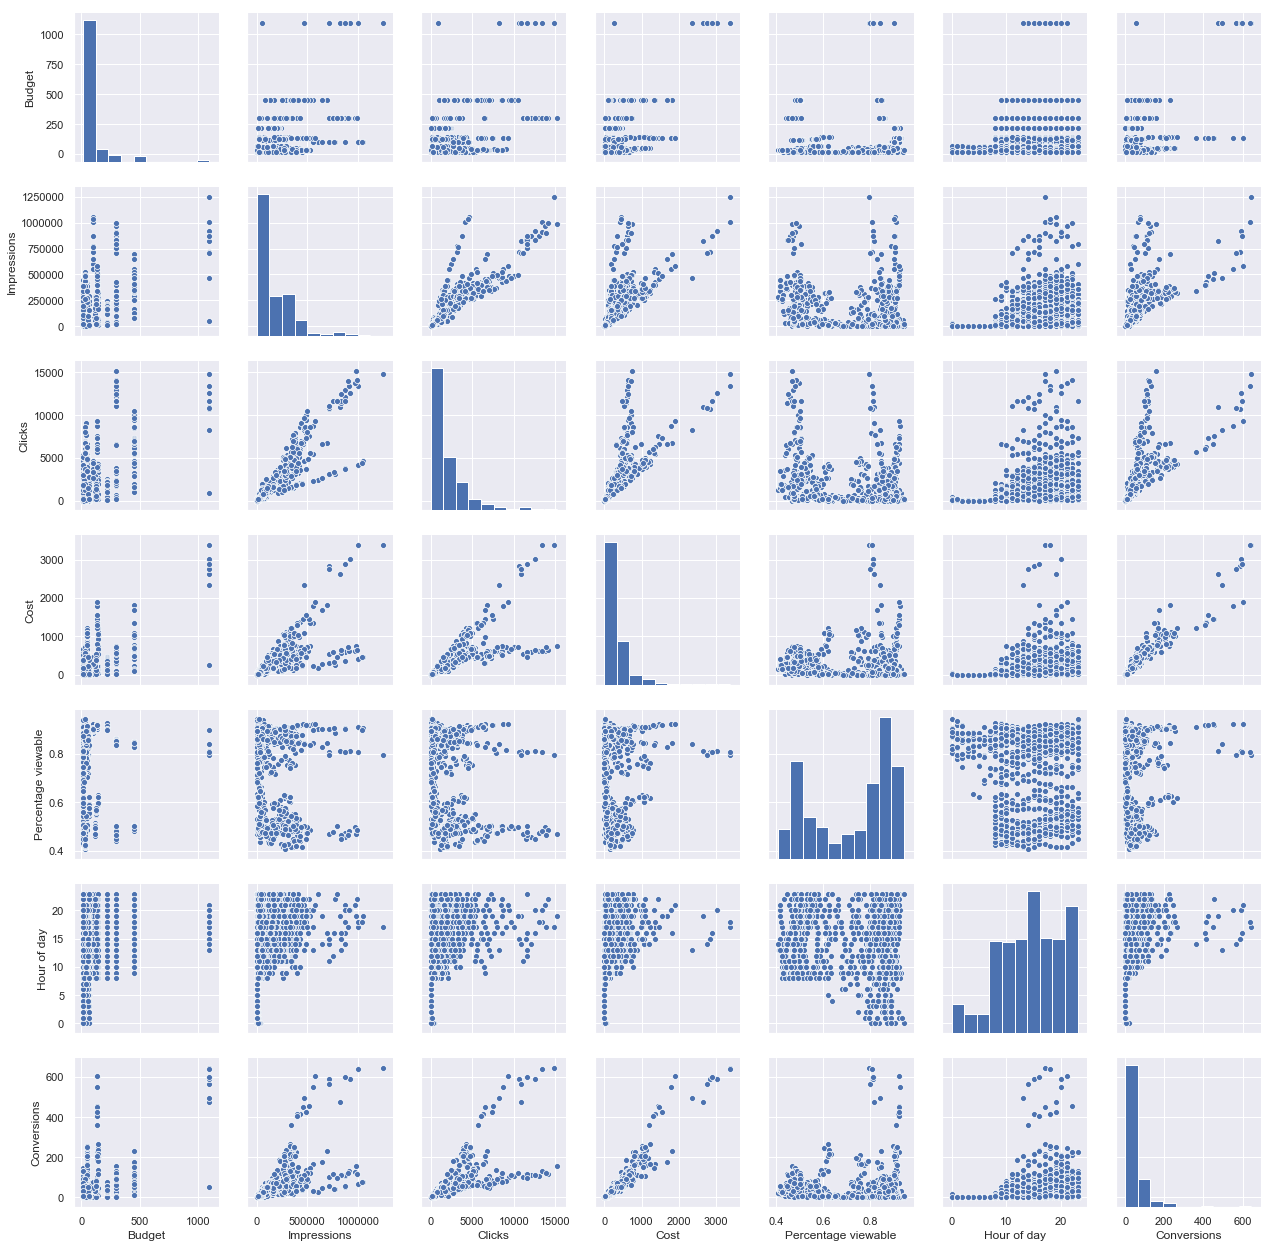

In [369]:
#Exploring
#pairplot
sns.pairplot(cp_m.drop(cp_m.columns[1], axis =1))

In [370]:
# prepared data set for modeling process
cp_m = cp_m[['Cost','Bid strategy','Hour of day','Conversions']]
cp_m.head(5)

,Cost,Bid strategy,Hour of day,Conversions
0,146.13,CPA Objective,9,22
1,12.76,CPC manual,9,1
2,406.81,CPC manual,23,58
3,289.86,CPA Objective,14,49
4,222.52,CPA Objective,11,26


In [371]:
##Performing linear regression using Sciki-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lin = LinearRegression()
x = cp_m.iloc[:, [0,2]].values
y = cp_m.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [372]:
lin_reg = lin.fit(x_train, y_train)
lin_pred = lin_reg.predict(x_test).astype('int64')

In [373]:
lin_res = pd.DataFrame({'Actual': y_test, 'Predicted': lin_pred, 'Diff': abs(lin_pred - y_test)})

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
#print (mean_squared_error (y_test, lin_pred))
print ('Mean value:', y_test.mean())
print('Mean Absolute Error:', mean_absolute_error(y_test, lin_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, lin_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, lin_pred)))
print('r2 score:',r2_score(y_test, lin_pred))

Mean value: 45.43975903614458
Mean Absolute Error: 11.843373493975903
Mean Squared Error: 511.03614457831327
Root Mean Squared Error: 22.60610856778126
r2 score: 0.9107838184877075


In [374]:
lin_res.head(5)

,Actual,Predicted,Diff
0,53,84,31
1,67,43,24
2,64,52,12
3,235,213,22
4,9,8,1


In [386]:
# Random Forest

# One-hot encode the data using pandas get_dummies
cp_rf = pd.get_dummies(cp_m)

In [387]:
cp_rf.head(5)
#reorder columns
reorder_2 = [0,1,3,4,5,6,2]
cp_rf = cp_rf[[cp_rf.columns[i] for i in reorder_2]].reset_index().drop('index', axis = 1)

In [388]:
cp_rf.head(5)

,Cost,Hour of day,Bid strategy_CPA Objective,Bid strategy_CPC (enhanced),Bid strategy_CPC manual,Bid strategy_Maximize clicks,Conversions
0,146.13,9,1,0,0,0,22
1,12.76,9,0,0,1,0,1
2,406.81,23,0,0,1,0,58
3,289.86,14,1,0,0,0,49
4,222.52,11,1,0,0,0,26


In [378]:
# Labels are the values we want to predict
labels = np.array(cp_rf['Conversions'])

# Remove the labels from the features
# axis 1 refers to the columns
features= cp_rf.drop('Conversions', axis = 1)

# Saving feature names for later use
feature_list = list(cp_rf.columns)

# Convert to numpy array
features = np.array(features)

In [379]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = \
train_test_split(features, labels, test_size = 0.2, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (663, 6)
Training Labels Shape: (663,)
Testing Features Shape: (166, 6)
Testing Labels Shape: (166,)


In [380]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [381]:
rf_pred = rf.predict(test_features)

In [345]:
#rf_res = rf_pred.astype('int64')
rf_pred

array([ 21.02614351,  15.37620717,  67.0944    ,  39.78442496,
         6.257     ,   0.974     ,  31.26671895,  16.45271429,
        75.56006667,  60.4328132 ,  57.931     ,  51.948     ,
       313.731     ,  21.02614351,  84.29077143,  39.78442496,
        35.628     ,  66.03295952,  31.26671895, 486.464     ,
        60.364     ,  39.78442496,   3.30638578,   6.7636    ,
        29.61653387,  24.15940397,   1.95472937,  61.84481627,
         0.01097262,  60.06675   ,  57.45237143,  26.1965    ,
       102.24288571,  41.17785006,   8.622063  , 116.64569524,
        58.415     ,  19.14908623,  29.93      ,  42.813     ,
        17.20937937,   8.28589762,  29.73267619,  16.836     ,
         0.246     , 144.88012381,  46.006     ,  60.77040714,
        44.44080357,  58.20616667,   0.27664286,  68.84811401,
        30.20788906,   5.40530237,  38.34206389,  60.4328132 ,
        93.06316905,  21.02614351, 125.865     ,  54.959     ,
        52.49791548,   0.955     , 189.31585595, 125.06

In [382]:
# evaluation:
print ('Mean value:', test_labels.mean())
print('Mean Absolute Error:', mean_absolute_error(test_labels, rf_pred))  
print('Mean Squared Error:', mean_squared_error(test_labels, rf_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_labels, rf_pred)))

Mean value: 43.5
Mean Absolute Error: 10.541795180722891
Mean Squared Error: 795.9753587710843
Root Mean Squared Error: 28.213035263350953


In [383]:
rf_restb = pd.DataFrame({'Actual': test_labels, 'Predicted': rf_res, 'Diff:': abs(rf_res - test_labels)})
rf_restb.head(5)

,Actual,Predicted,Diff:
0,11,9,2
1,1,2,1
2,59,56,3
3,1,2,1
4,6,11,5


In [384]:
#Tuning RF using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [385]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
base_rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation,search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)

# Fit the random search model
rf_random.fit(train_features, train_labels)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   2.7s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   2.3s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   2.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True, total=   1.5s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True, total=   1.5s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=1200, 

[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=98, bootstrap=False, total=   3.1s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False, total=   2.4s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False, total=   2.4s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False, total=   2.4s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=21, bootstrap=True 
[CV]  n_estima

[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False, total=   1.6s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False, total=   1.6s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False, total=   1.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimator

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   1.5s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   1.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False 
[CV]  n_estimators=200, min_

[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=54, bootstrap=True, total=   1.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   1.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   1.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   1.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=200

[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False, total=   2.6s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False, total=   2.6s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False, total=   2.6s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=32, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=32, bootstrap=False, total=   0.8s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=32, bootstrap=False 
[CV]  n_estimators=800,

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False, total=   0.2s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, total=   0.8s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, total=   0.8s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=600, min_sampl

[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=32, bootstrap=True, total=   0.8s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True, total=   2.4s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True, total=   2.4s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True, total=   2.4s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=54, bootstrap=False 
[CV]  n_estimators=2000, mi

[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True, total=   2.5s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True, total=   2.5s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True, total=   2.5s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=21, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=21, bootstrap=False, total=   2.0s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=21, bootstrap=False 
[CV]  n_estimators=200

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  7.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=1000,
                             

In [395]:
best_random = rf_random.best_estimator_
print (best_random)
brf_pred = best_random.predict(test_features)

# evaluation:
print ('Mean value:', test_labels.mean())
print('Mean Absolute Error:', mean_absolute_error(test_labels, brf_pred))  
print('Mean Squared Error:', mean_squared_error(test_labels, brf_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_labels, brf_pred)))
print('r2 score', r2_score(test_labels, brf_pred))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=32, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1600, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
Mean value: 43.5
Mean Absolute Error: 9.952242093373494
Mean Squared Error: 541.0662664997882
Root Mean Squared Error: 23.260831165282728
r2 score 0.8997275402462854


In [390]:
#Using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [25,30,40,50],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,3,4,5,6,7,10],
    'n_estimators': [100, 200, 300, 1000]
}

base_rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = base_rf, param_grid = param_grid)

In [391]:
grid_search.fit(train_features, train_labels)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [392]:
best_grid = grid_search.best_estimator_
print(best_grid)
brfg_pred = best_grid.predict(test_features)

# evaluation:
print ('Mean value:', test_labels.mean())
print('Mean Absolute Error:', mean_absolute_error(test_labels, brfg_pred))  
print('Mean Squared Error:', mean_squared_error(test_labels, brfg_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_labels, brfg_pred)))
print('OOB score:',best_grid.score(test_features,test_labels))
print('r2 score:', r2_score(test_labels, brfg_pred))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Mean value: 43.5
Mean Absolute Error: 9.890220883534136
Mean Squared Error: 534.5568074297189
Root Mean Squared Error: 23.12048458466472
OOB score: 0.9009338979755235
r2 score: 0.9009338979755235


In [396]:
brf_restb = pd.DataFrame({'Actual': test_labels, 'Predicted': brfg_pred, 'Diff:': abs(brfg_pred - test_labels)})
brf_restb.head(10)

,Actual,Predicted,Diff:
0,11,6.873333,4.126667
1,1,1.806667,0.806667
2,59,54.180000,4.820000
3,1,2.176667,1.176667
4,6,12.283333,6.283333
5,0,0.993333,0.993333
6,8,8.450000,0.450000
7,12,14.926667,2.926667
8,58,70.330000,12.330000
9,91,106.246667,15.246667
